# Fake News Classifier Using Natural Language Processing ( NLP ) :

##### I will be dividing This Project into 2 parts , First i will try to come up with solution of this classification via Normal algorithms stepwise,then i will create another section by using pipeline

## Basic Data Exploration : 

In [69]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Some Exploratory Data Analysis :

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

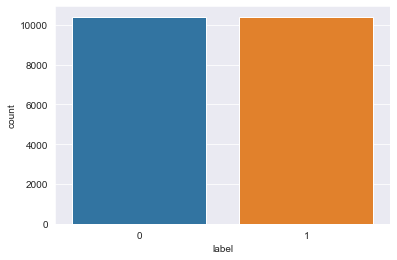

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)

In [9]:
df.groupby('label').count()

,id,title,author,text
label,,,,
0,10387,10387,10361,10387
1,10413,9855,8482,10374


In [10]:
df['length']=df['title'].astype(str).apply(len)

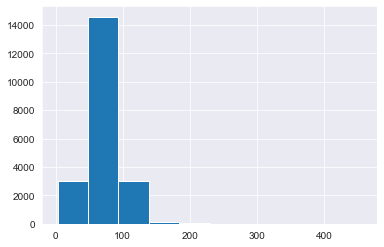

In [11]:
df['length'].hist()

In [12]:
df=df.dropna()
messages=df.copy()




In [13]:
messages.reset_index(inplace=True)

In [14]:
messages.head(10)

,index,id,title,author,text,label,length
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,33
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,63
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,93
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,124
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,87
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,93
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,96
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,58


In [15]:
df.groupby('author').nunique().T

author,# 1 NWO Hatr,-NO AUTHOR-,10 Habits That Will Make Your Life Easier &amp; More Peaceful - Wellness Solutions,"10 More Beautiful Images That Remind You We Still Live In A Beautiful World, With Beautiful People - Upside Down Media",10 Movies That Could Change Your Understanding Of Life - Upside Down Media,10 Nutritious Foods That Help Reduce Asthma Attacks &amp; Boost Your Health - Health Alternative Solutions,10 Presidents &amp; Politicians Who Told Us That A “Secret Government” Controls The World &amp; What They Said - Upside Down Media,10 Shocking Facts About Society That We Absurdly Accept As Normal – Digital Flow,11 Things To Let Go Of Before The New Year,11 Things To Let Go Of Before The New Year – Motivate3.com,...,Леонтина Литвинова,Светлана Якн,Тьерри Мейсан,Юлия Громова,برنامه ریزی ضمیر ناخوداگاه,تييري ميسان,جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال 1390 - کدآمایی,سعيد هلال الشريفي,“SHOOT FIRST ASK QUESTIONS LATER” : WHAT HAPPENS TO A UFO WHEN TRACKED ON MILITARY RADAR - Black Barth,“Shoot First Ask Questions Later” : What Happens To A UFO When Tracked on Military Radar – Mystical Shire
id,17,54,1,1,1,1,1,1,1,1,...,4,2,2,2,1,1,1,1,1,1
title,17,37,1,1,1,1,1,1,1,1,...,4,2,2,2,1,1,1,1,1,1
author,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
text,17,53,1,1,1,1,1,1,1,1,...,4,2,2,2,1,1,1,1,1,1
label,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
length,16,24,1,1,1,1,1,1,1,1,...,4,2,2,2,1,1,1,1,1,1


## Text Preprocessing :

In [16]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer


In [17]:
cor=[]
ps=PorterStemmer()

In [18]:
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=messages['title'][i]
    review=review.lower()
    review=review.split()
    
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    cor.append(review)

In [19]:
cor[3]

'15 civilian kill singl us airstrik identifi'

In [20]:
cor

['hous dem aide: didn’t even see comey’ letter jason chaffetz tweet',
 'flynn: hillari clinton, big woman campu - breitbart',
 'truth might get fire',
 '15 civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason: hollywood would love trump bomb north korea lack tran bathroom (exclus video) - breitbart',
 'benoît hamon win french socialist party’ presidenti nomin - new york time',
 'back-channel plan ukrain russia, courtesi trump associ - new york time',
 'obama’ organ action partner soros-link ‘indivisible’ disrupt trump’ agenda',
 'bbc comedi sketch "real housew isis" caus outrag',
 'russian research discov secret nazi militari base ‘treasur hunter’ arctic [photos]',
 'us offici see link trump russia',
 're: yes, paid govern troll social media, blogs, forum websit',
 'major leagu soccer, argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay $2.5 milli

## Normal Algorithm Set Up :

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [23]:
cv=CountVectorizer()
msg=cv.fit_transform(cor)

In [24]:
msg

<18285x17534 sparse matrix of type '<class 'numpy.int64'>'
	with 161520 stored elements in Compressed Sparse Row format>

In [25]:
tar=messages['label']

In [26]:
msg.shape

(18285, 17534)

In [27]:
tar.shape

(18285,)

In [28]:
tfidf=TfidfTransformer()

In [29]:
tf=tfidf.fit_transform(msg)

In [30]:
tf.shape

(18285, 17534)

## Train Test Split 

In [32]:
from sklearn.model_selection import train_test_split

In [44]:
msg_train,msg_test,tar_train,tar_test=train_test_split(tf,tar,test_size=0.3,random_state=0)

In [45]:
classifier_mod=MultinomialNB()

In [46]:
classifier_mod.fit(msg_train,tar_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
classifier_mod.predict(msg_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [48]:
cm_pred=classifier_mod.predict(msg_test)

### Metrics Evaluation :

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
print(classification_report(tar_test,cm_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      3084
           1       0.96      0.68      0.79      2402

    accuracy                           0.84      5486
   macro avg       0.87      0.83      0.83      5486
weighted avg       0.86      0.84      0.84      5486



In [51]:
print(confusion_matrix(tar_test,cm_pred))

[[3008   76]
 [ 780 1622]]


In [52]:
print('The Accuracy Score Is : ',round(accuracy_score(tar_test,cm_pred),2))

The Accuracy Score Is :  0.84


## Pipeline :

### Train Test Split  For Pipeline :

In [53]:
X=messages['title']
y=messages['label']

In [54]:
X.shape

(18285,)

In [55]:
y.shape

(18285,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
X_train.shape

(14628,)

In [59]:
y_train.shape

(14628,)

## Pipeline:

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [61]:
pipeline=Pipeline([
   ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [62]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [63]:
pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
pred=pipeline.predict(X_test)

In [65]:
df33=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df33.head(10)

,Actual,Predicted
7179,0,0
3971,0,0
13077,1,0
15967,0,1
10882,0,0
5416,1,1
680,1,1
3313,1,1
12366,0,0
3835,0,0


In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2088
           1       0.96      0.69      0.80      1569

    accuracy                           0.85      3657
   macro avg       0.88      0.83      0.84      3657
weighted avg       0.87      0.85      0.85      3657



In [68]:
print('The Accuracy Score Is :',round(accuracy_score(y_test,pred),2))

The Accuracy Score Is : 0.85


## As You can see , pipeline proved with better accuracy score and results..